In [5]:
%load_ext autoreload
%autoreload 2
import sys
#might need to include the sys calls if modules are not found
sys.path.append('/glade/campaign/acom/acom-weather/pfister/ANALYSIS/MELODIES/monetio')
sys.path.append('/glade/campaign/acom/acom-weather/pfister/ANALYSIS/MELODIES/monet')
sys.path.append('/glade/campaign/acom/acom-weather/pfister/ANALYSIS/MELODIES/MELODIES-MONET/')
%load_ext autoreload
%autoreload 2
from melodies_monet import driver
driver.__file__
import melodies_monet as mm
import monetio as mio
print(mio.__file__)
import monet
print(monet.__file__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/glade/campaign/acom/acom-weather/pfister/ANALYSIS/MELODIES/monetio/monetio/__init__.py
/glade/campaign/acom/acom-weather/pfister/ANALYSIS/MELODIES/monet/monet/__init__.py


In [6]:
import xarray as xr
from melodies_monet import driver

an = driver.analysis()
an.control = "/glade/campaign/acom/acom-weather/pfister/ANALYSIS/MELODIES/fromPablo/Demo/control_tempo_l2_no2_camchem_wrfchem-plot_region.yaml"
an.read_control()
an.read_analysis()

Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240701_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240702_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240703_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240704_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240705_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240706_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240707_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240708_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/work/plichtig/melodies_monet/test_cases/tempo_pairing/20240709_tempo_l2_no2_wrfchem_v4.2.nc4
Reading: /glade/wor

In [7]:
an.obs["tempo_l2_FNR"] = driver.observation()
an.obs["tempo_l2_FNR"].sat_type = "tempo_l2"
an.obs["tempo_l2_FNR"].variable_dict = {"tempo_l2_FNR": {"ylabel_plot": "FNR"}}

models = ["wrfchem_v4.2", "cesm_fv"]
no2 = ["no2", "NO2"]
hcho = ["hcho", "CH2O"]

for pair in an.paired.keys():
    an.paired[pair].obj = an.paired[pair].obj.sel(time=(an.paired[pair].obj['time'].dt.hour > 4))

for no2_m, hcho_m, model in zip(no2, hcho, models):
    ratio_FNR = xr.Dataset()
    ratio_FNR["tempo_l2_FNR"] = (
        an.paired[f"tempo_l2_hcho_{model}"].obj["vertical_column"]
        / an.paired[f"tempo_l2_no2_{model}"].obj["vertical_column_troposphere"]
    ).where(an.paired[f"tempo_l2_no2_{model}"].obj["vertical_column_troposphere"] > 1e15)
    ratio_FNR[f"{model}_FNR"] = (
        an.paired[f"tempo_l2_hcho_{model}"].obj[hcho_m]
        / an.paired[f"tempo_l2_no2_{model}"].obj[no2_m]
    ).where(an.paired[f"tempo_l2_no2_{model}"].obj[no2_m] > 1e15)

    p = driver.pair()
    p.type = "sat_swath_clm"
    p.obs = "tempo_l2_FNR"
    p.model = f"{model}"
    p.model_vars = [f"{model}_FNR"]
    p.obs_vars = ["tempo_l2_FNR"]
    p.obj = ratio_FNR
    p.filename = f"tempo_l2_FNR_{model}.nc"
    an.paired[f"tempo_l2_FNR_{model}"] = p

{'color': 'k', 'linestyle': '-', 'marker': '*', 'linewidth': 2.0, 'markersize': 10.0, 'vmax_plot': 4000000000000000.0, 'label': 'tempo_l2_no2', 'fontsize': 14.4}


/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfu

{'color': 'k', 'linestyle': '-', 'marker': '*', 'linewidth': 2.0, 'markersize': 10.0, 'label': 'tempo_l2_hcho', 'fontsize': 14.4}


/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfu

{'color': 'k', 'linestyle': '-', 'marker': '*', 'linewidth': 2.0, 'markersize': 10.0, 'label': 'tempo_l2_FNR', 'fontsize': 14.4}


/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/glade/work/pfister/conda-envs/melodies-monet/lib/python3.11/site-packages/numpy/lib/nanfu

0 1e+16
0 1e+16
0 1e+16
0 1e+16
0 3e+16
0 3e+16
0 3e+16
0 3e+16
0 10
0 10
0 10
0 10


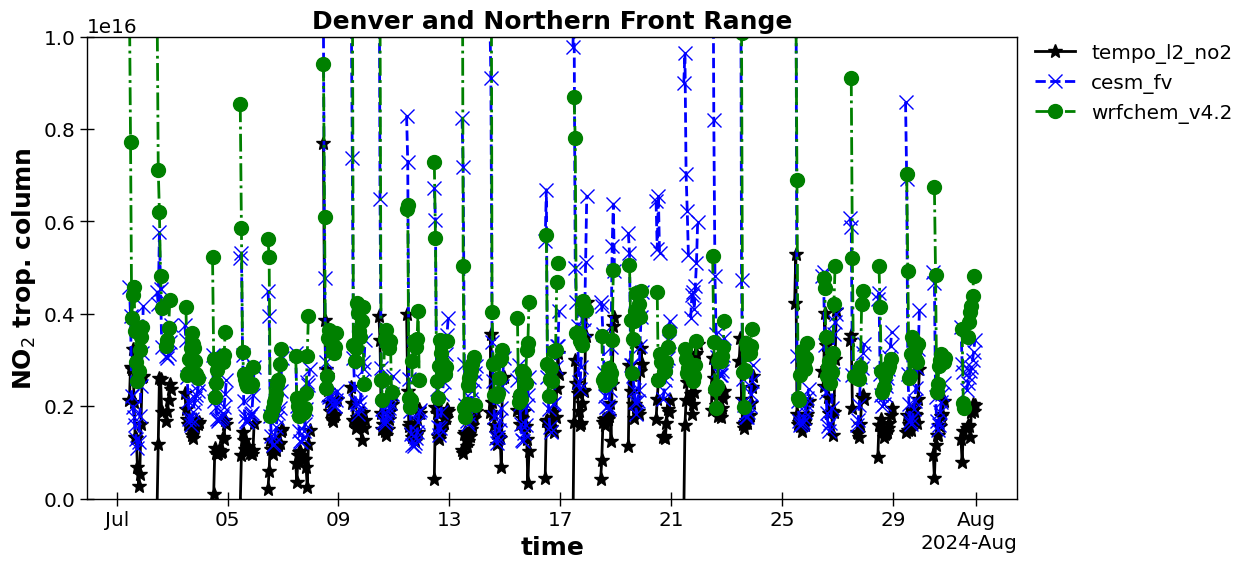

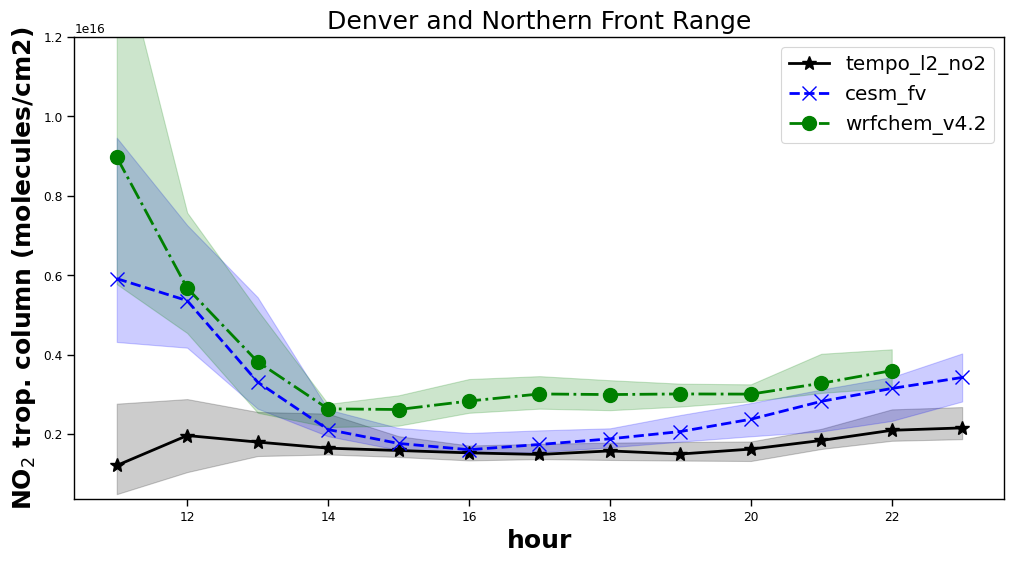

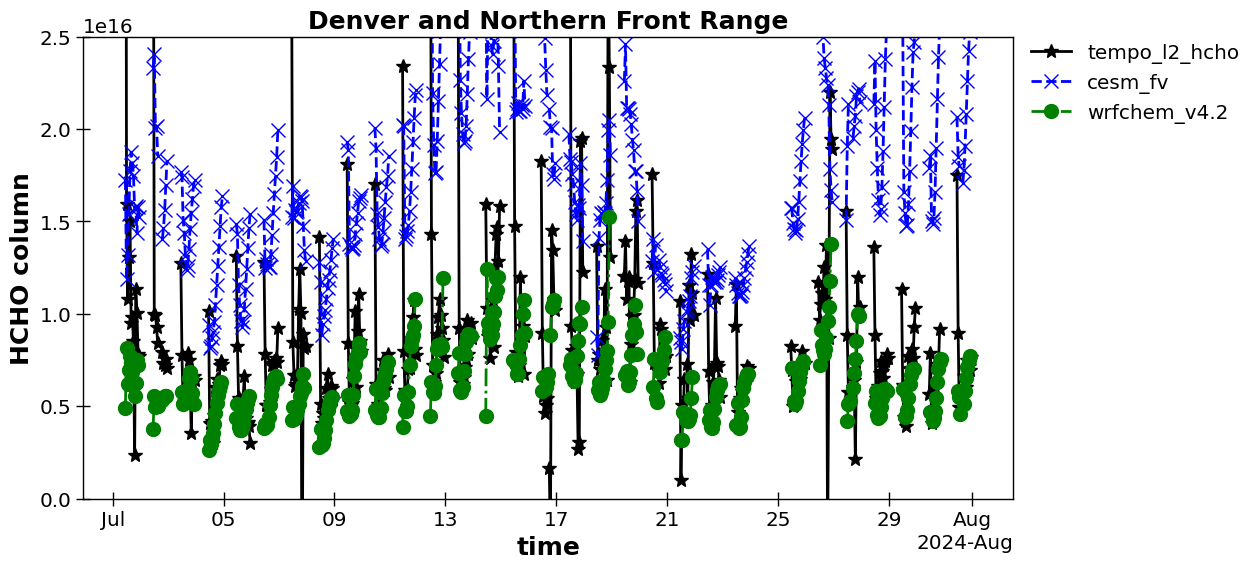

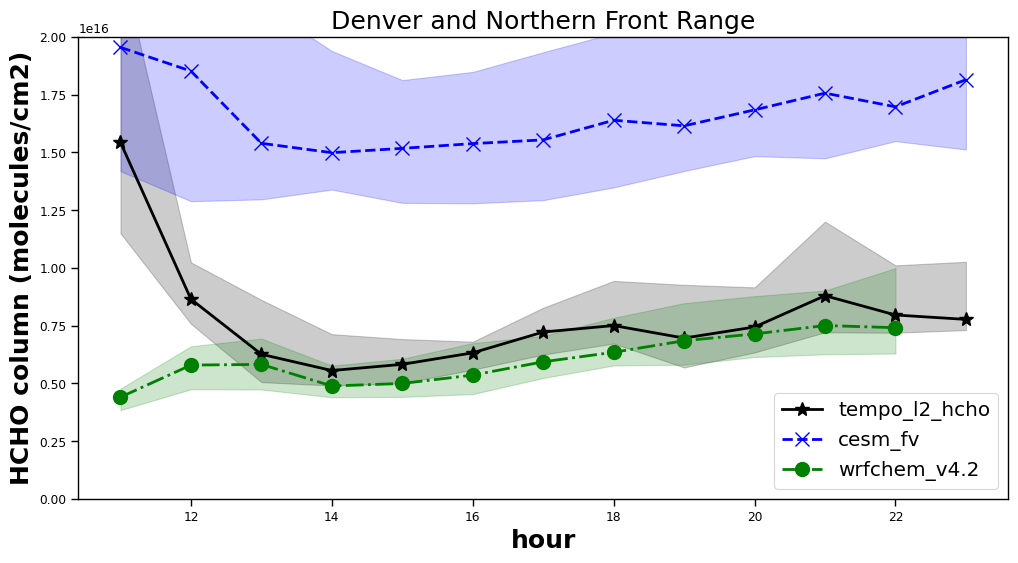

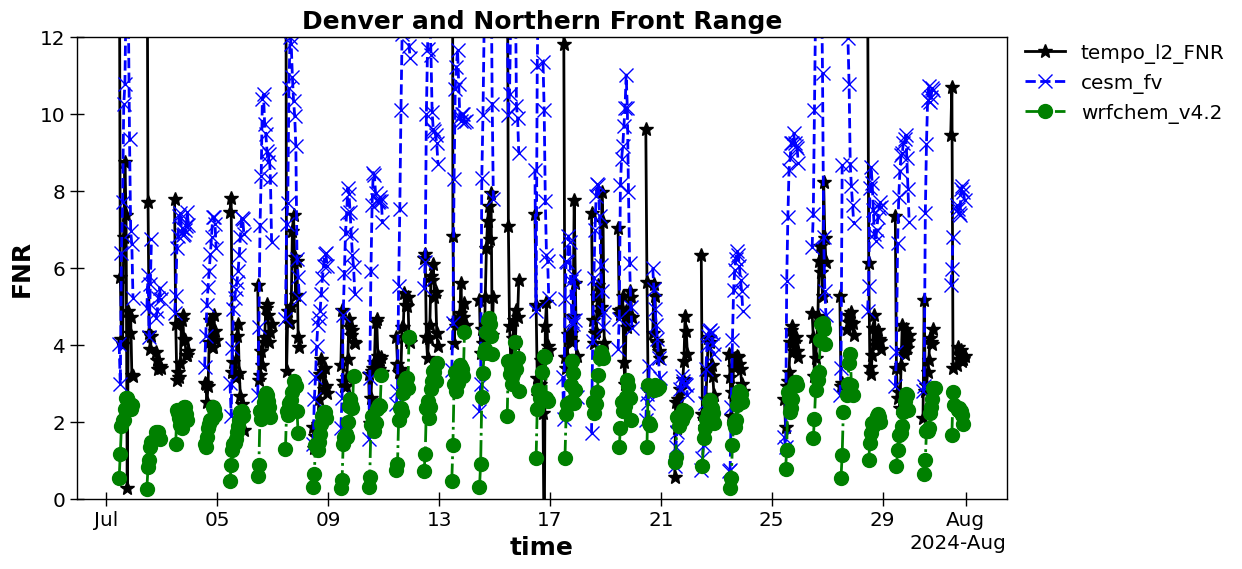

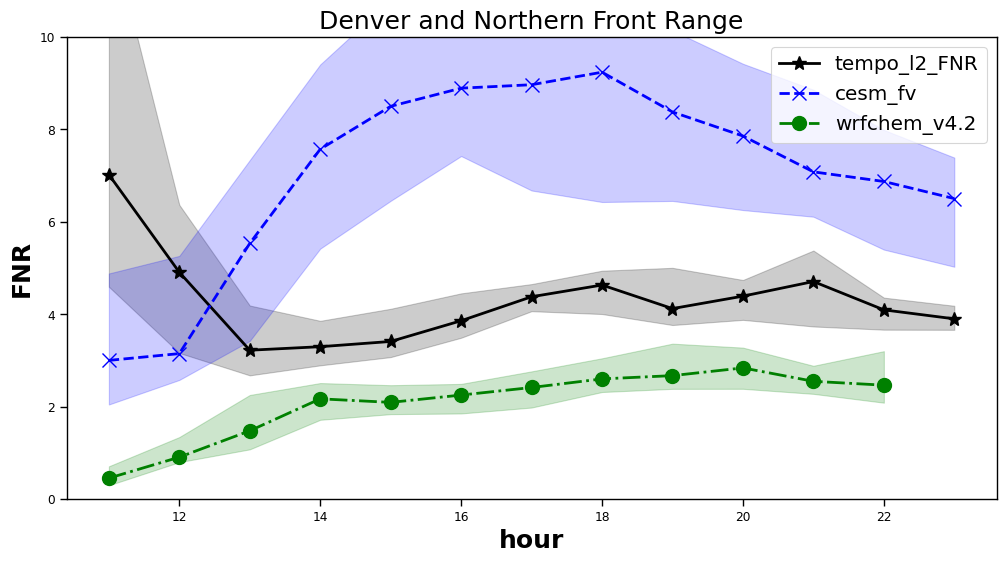

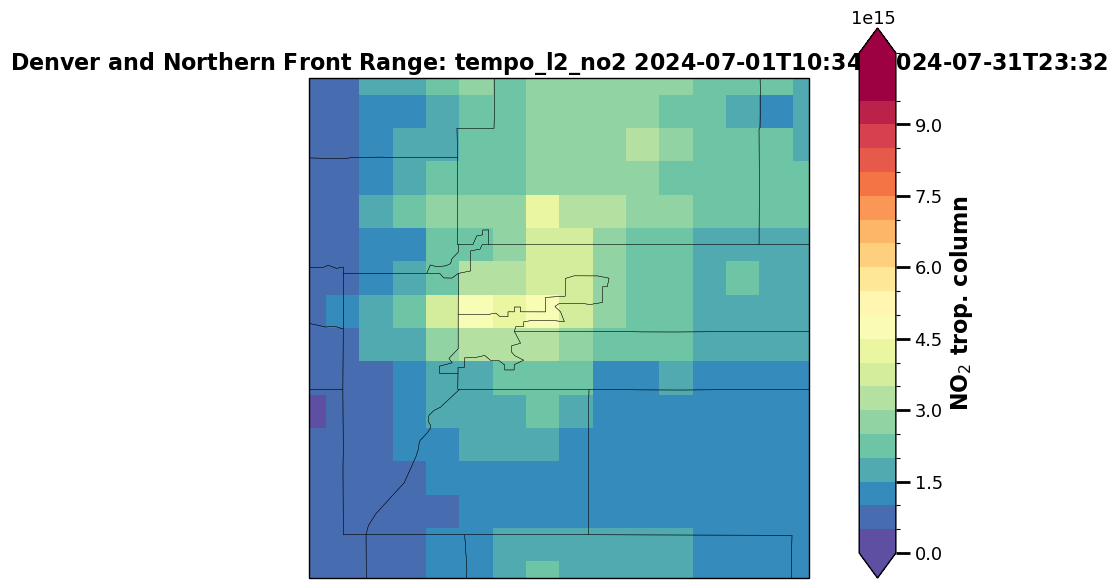

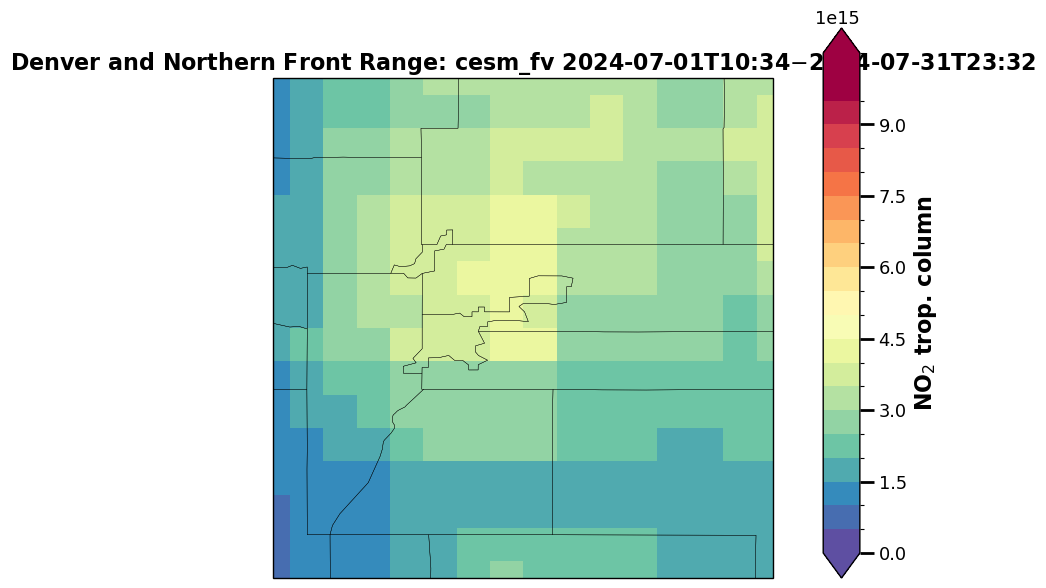

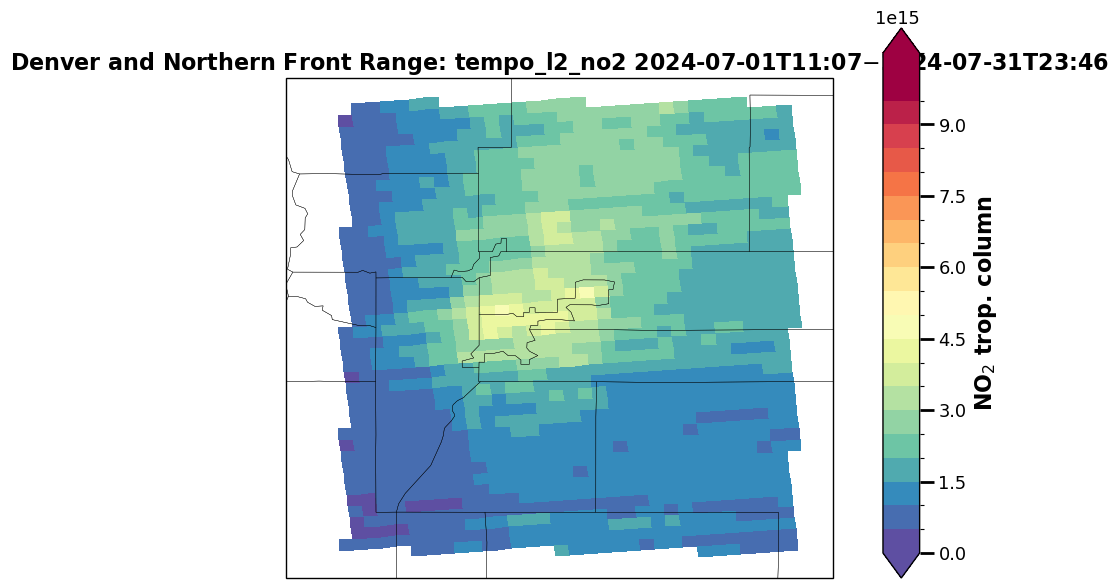

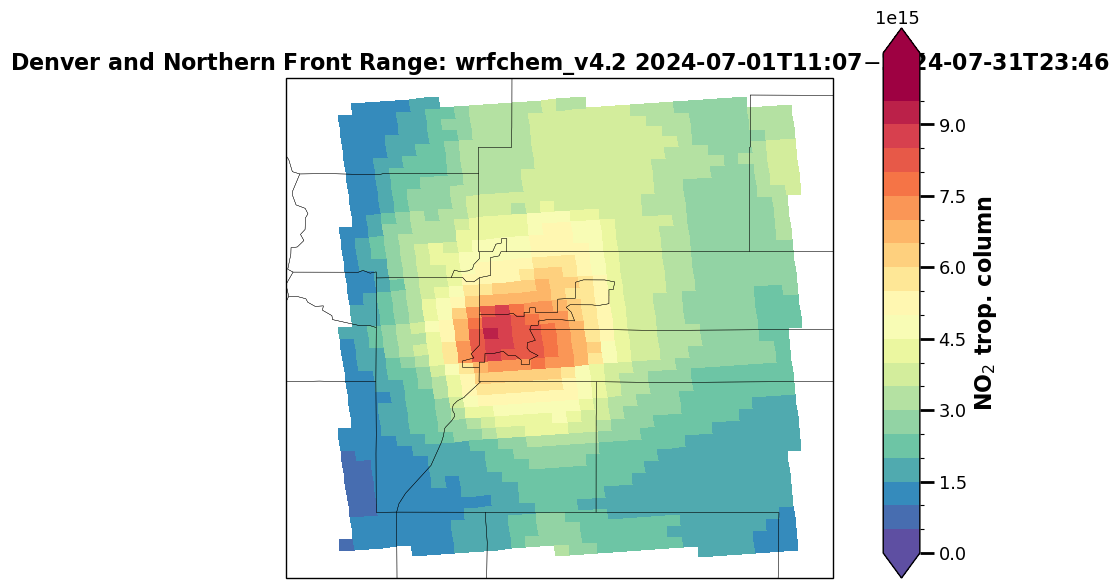

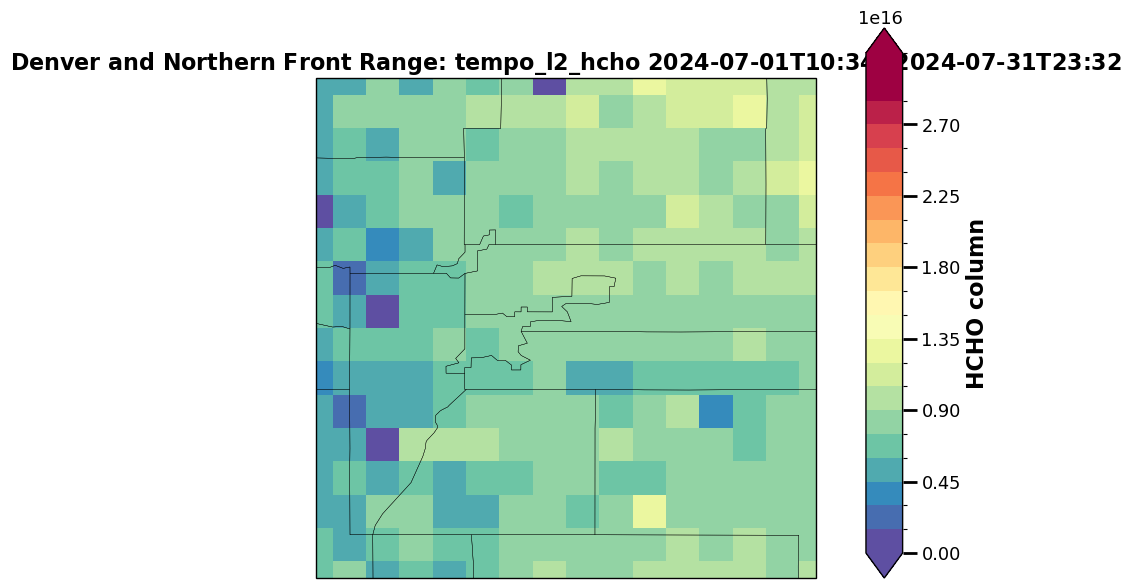

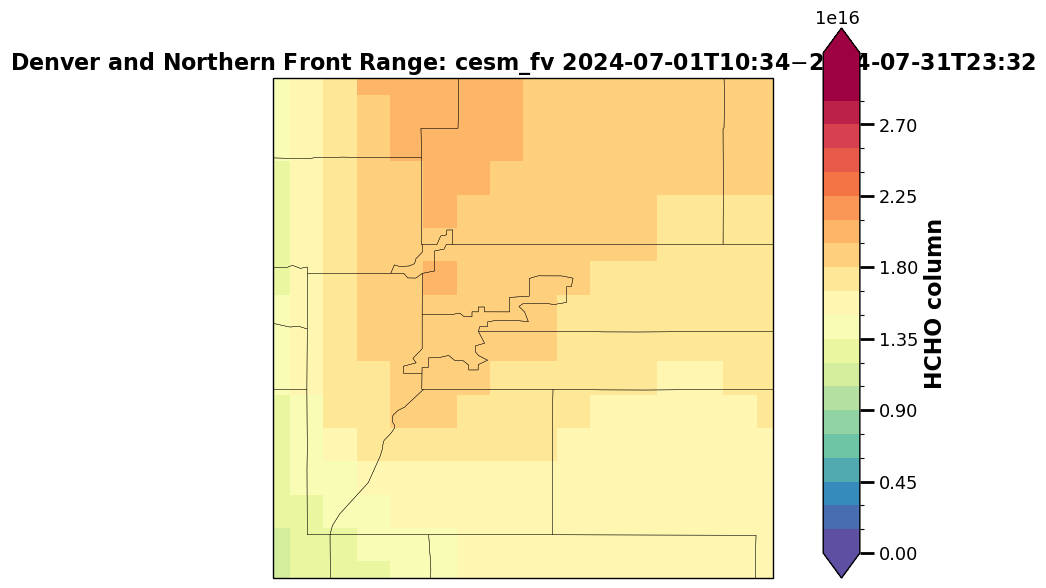

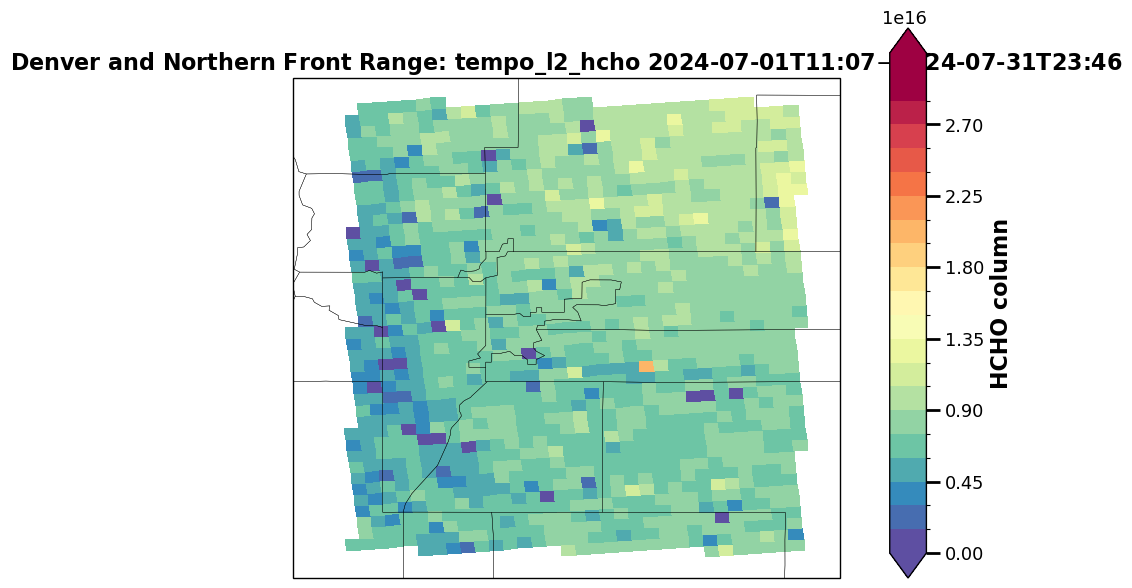

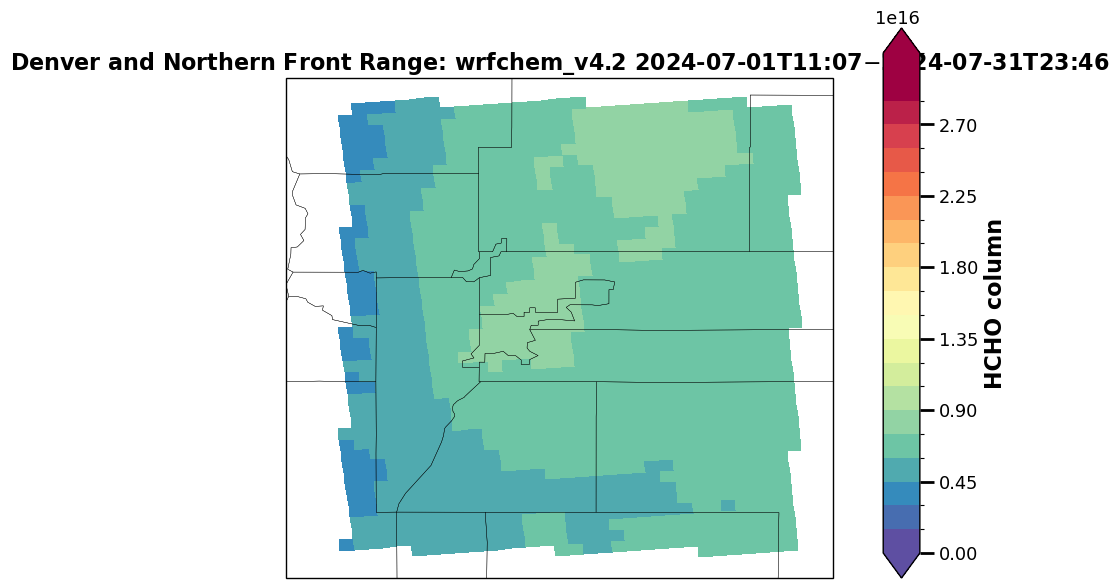

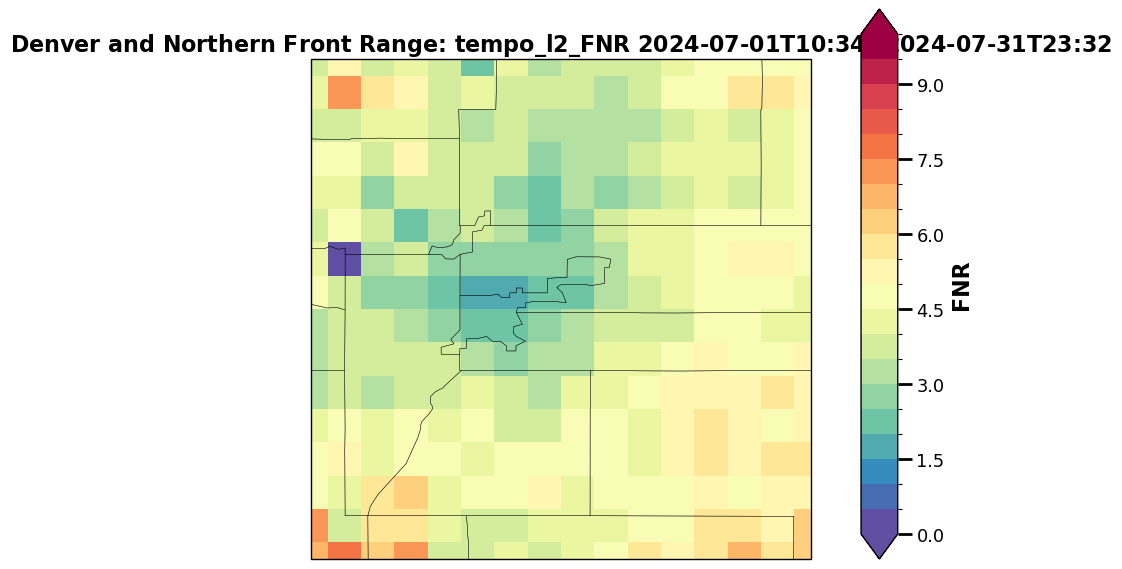

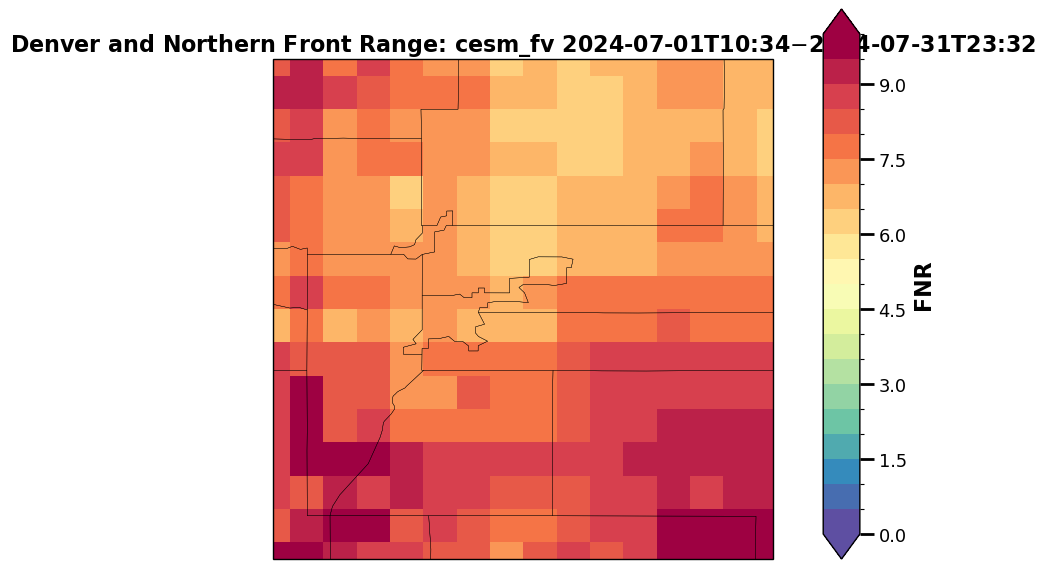

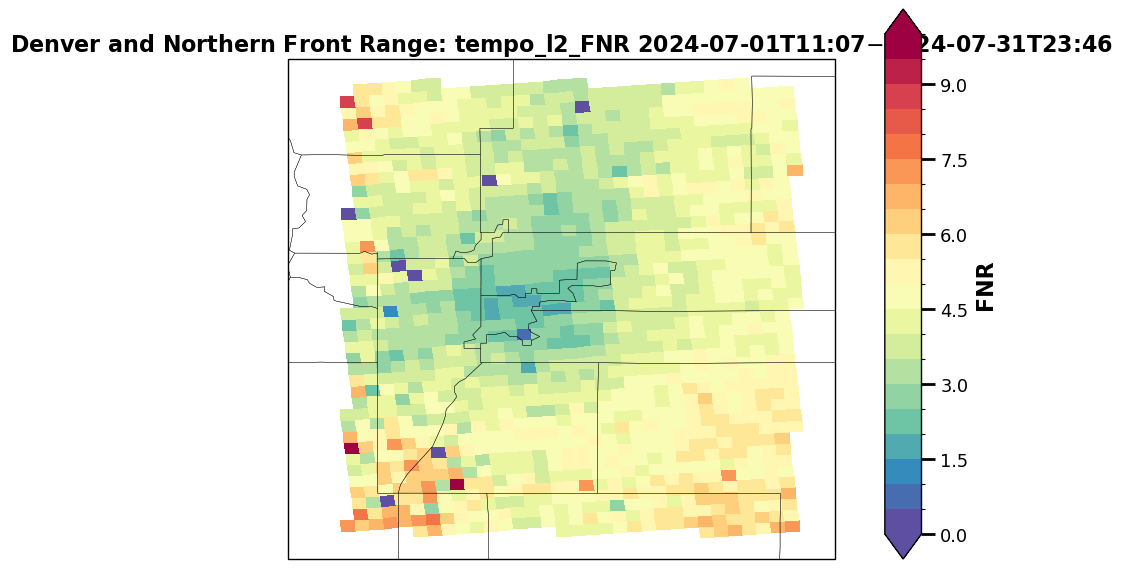

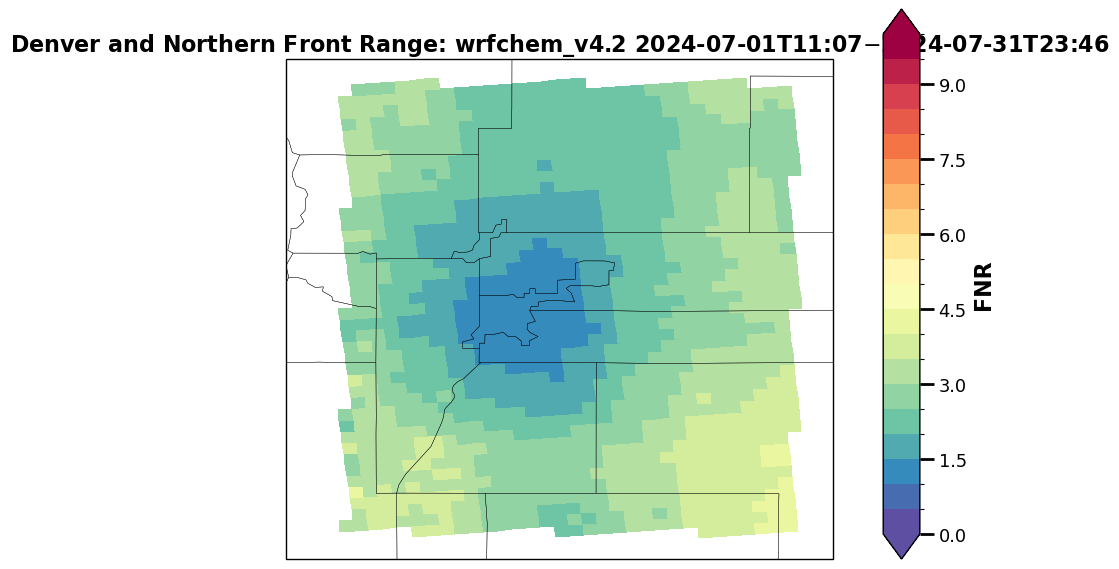

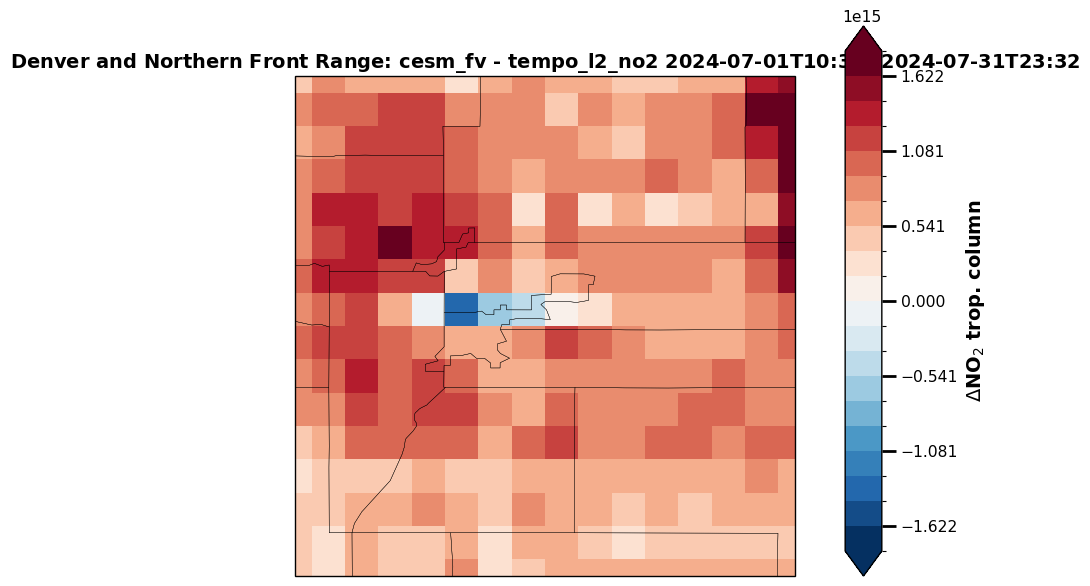

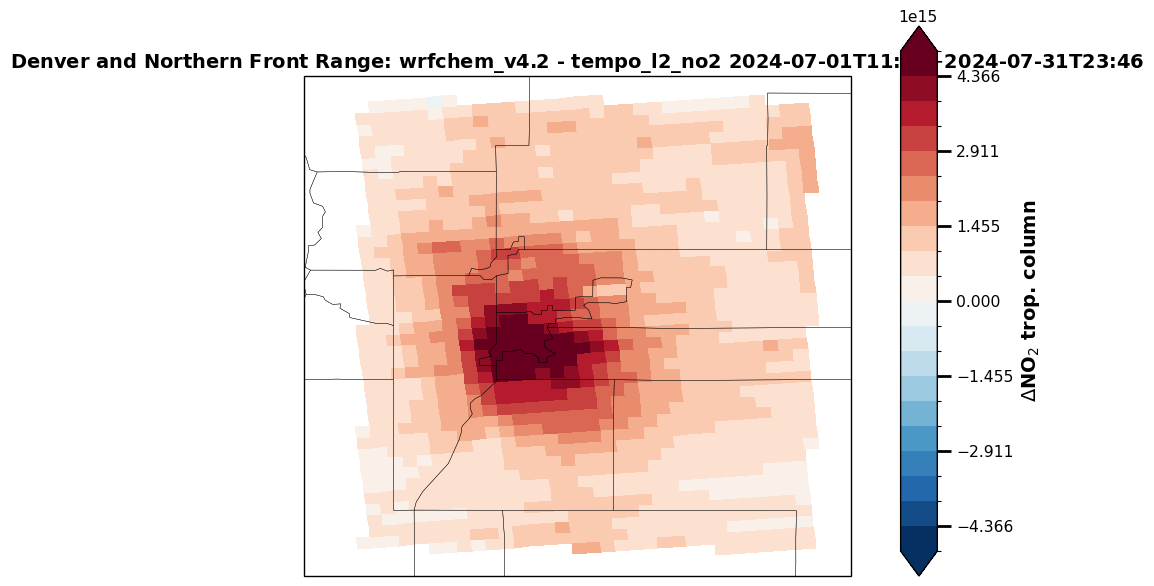

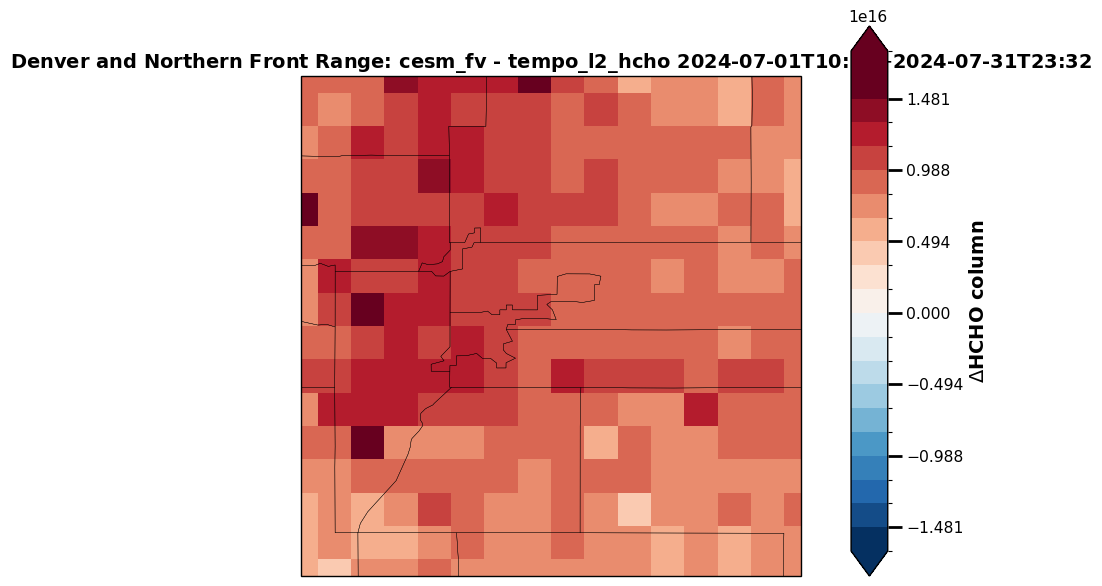

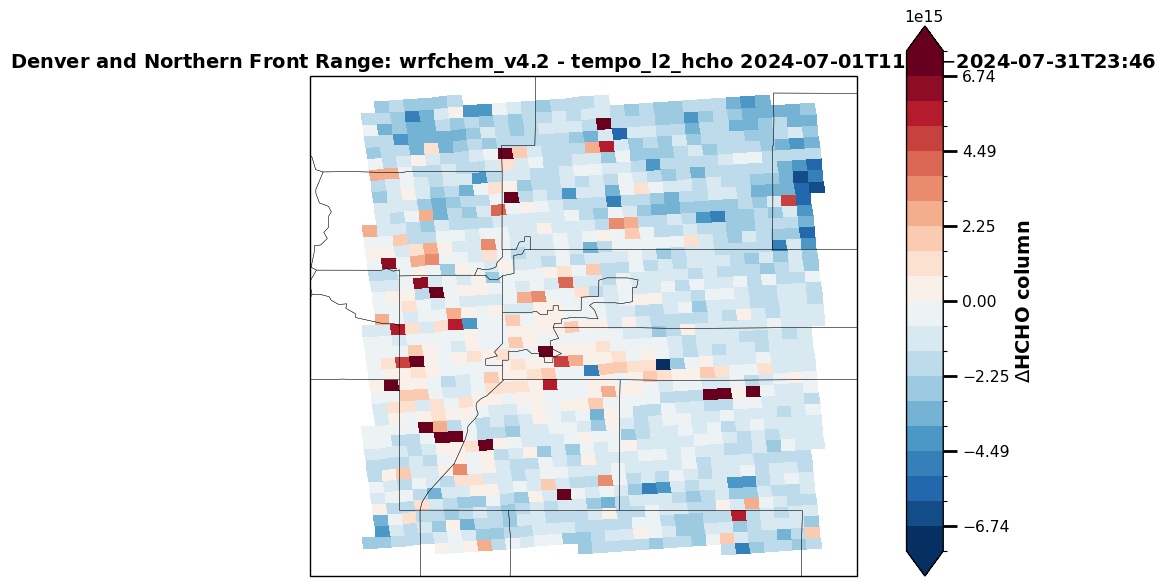

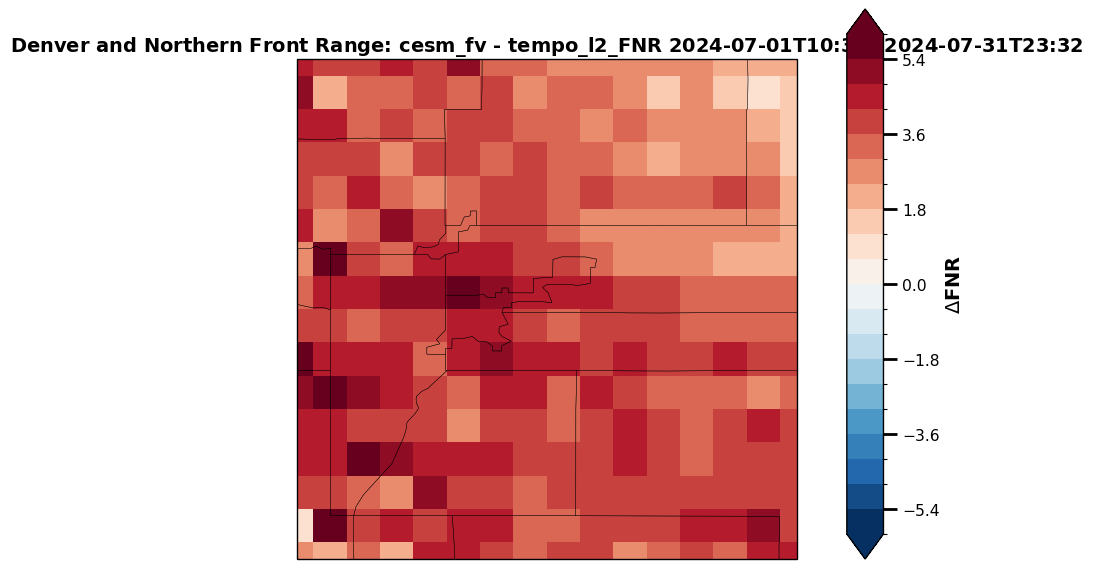

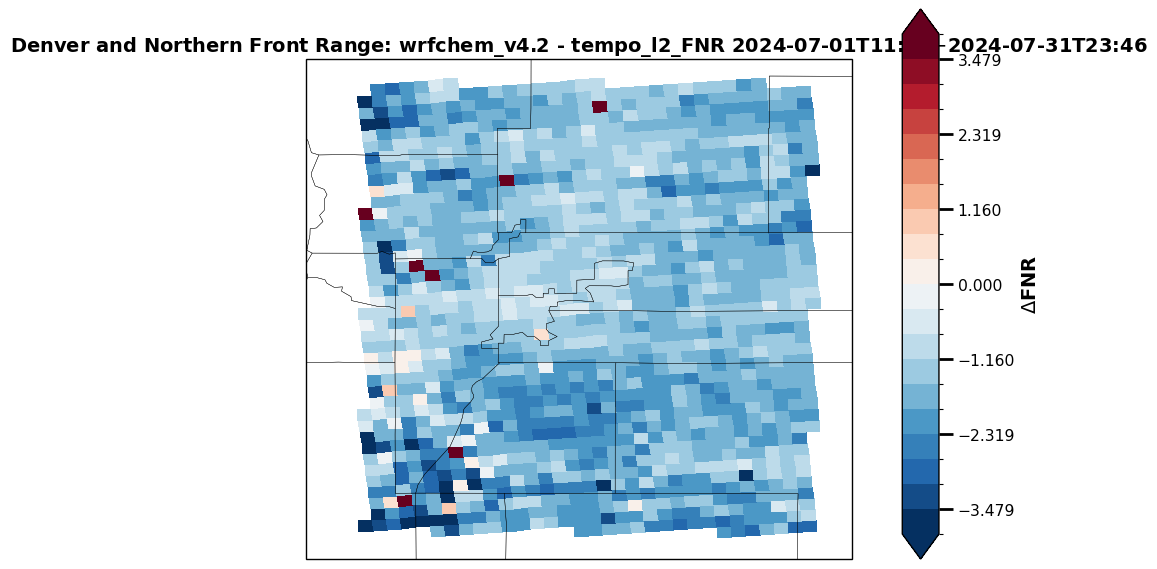

In [8]:
an.read_control()
an.plotting()